In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv('../data/CP_DATA.csv')

In [57]:
X = df["X"].values.tolist()
Y = df["Y"].values.tolist()
Z = df["LABEL"].values.tolist()

In [58]:
input_data = np.column_stack((X, Y))

In [59]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 7
        outLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_HI1)
        self.hidden1_output = self.sigmoid(hidden1_input)
        hidden2_input = np.dot(self.hidden1_output, self.W_H1H2)
        self.hidden2_output = self.sigmoid(hidden2_input)
        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        # Shape: (samples, neurons)
        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        # Update weights
        self.W_OH2 += self.hidden2_output.T.dot(output_delta)
        self.W_H1H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_HI1 += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


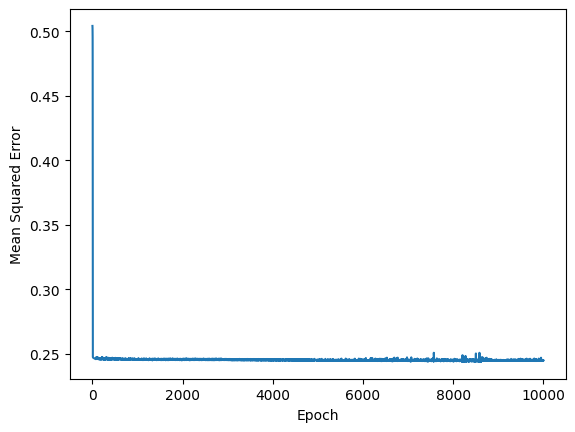

In [60]:
NN = NeuralNetwork()
input_data = np.column_stack((X, Y))
Z = np.array(Z).reshape(-1, 1)  
err = []
for i in range(10000):
    NN.train(input_data, Z)
    err.append(np.mean(np.square(Z - NN.feedForward(input_data))))

plt.plot(err)
plt.show()
    